# Diabetes Prediction Analysis USING DESCISION TREE MODEL

## Decision Tree: Classification

To apply the decision tree algorithm to classification tasks we will use the `DecisionTreeClassifier` estimator from the scikit-learn `tree` module. This estimator will construct, by default, a tree from a training data set. This estimator accepts several hyperparameters, including:

- `criterion`: The method by which to measure the quality of a potential split. By default the Gini impurity is used, although information gain can be specified by passing the string `entropy`.
- `max_depth`: The maximum depth of the tree. By default this is `None`, which means the tree is constructed until either all leaf nodes are pure, or all leaf nodes contain fewer instances than the `min_samples_split` hyperparameter value.
- `min_samples_split`: The minimum number of instances required to split a node into two child nodes. By default this value is two.
- `min_samples_leaf`: The minimum number of instances required to make a node terminal (i.e., a leaf node). By default this value is one.
- `max_features`: The number of features to examine when choosing the best split feature and value. By default this is `None`, which means all features will be explored.
- `random_state`: The seed for the random number generator used by this estimator. Setting this value ensures reproducibility.
- `class_weight`: Values that can improve classification performance on unbalanced data sets. By default this value is `None`.

Run `help(DecisionTreeClassifier)` to view more details about the model and the hyperparameters.

To demonstrate using a decision tree with the scikit-learn library, we will first load in the Iris data. With these data, we will construct a simple decision tree to introduce the concept of _feature importance_. Next, we will explore how to visualize the decision tree constructed by the `DecisionTreeClassifier` estimator. Finally, we will switch to a larger data set to learn how to employ a decision tree on more complex data.

----
[skdtc]: http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Life cycle of Machine learning Project
* Understanding the Problem Statement
* Data Collection
* Data Checks to perform
* Exploratory data analysis
* Data Pre-Processing
* Model Training
* Choose best model
#### 1) Problem statement
* This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
#### 2) Data Collection
* Data Source will be given by Client
* The data consists of 8 column and 1000 rows.
#### 2.1 Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [2]:
#import pandas library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [3]:
#loading dataset
df=pd.read_csv("diabetes_dataset.csv")


#### Show Top 5 Records

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Shape of the dataset

In [5]:
df.shape

(768, 9)

#### 2.2 Dataset information
* Pregnancies
* Glucose
* BloodPressure
* SkinThickness
* Insulin
* BMI
* Diabetes Pedigree Function
* Age
* Outcome
#### 3. Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data type
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column
#### 3.1 Check Missing values

In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no missing values in the data set
#### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

0

There are no duplicates values in the data set
#### 3.3 Check data types

In [8]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 3.4 Checking the number of unique values of each column

In [9]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### 3.5 Check statistics of data set

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### 3.6 Exploring Data

In [11]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Checking Unique Value
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

#### 4. Exploring Data ( Visualization )


##### 4.1 Visualize Age distribution and other parameters to make some conclusion.
* Histogram
* Kernel Distribution Function (KDE)
##### 4.1.1 Histogram & KDE

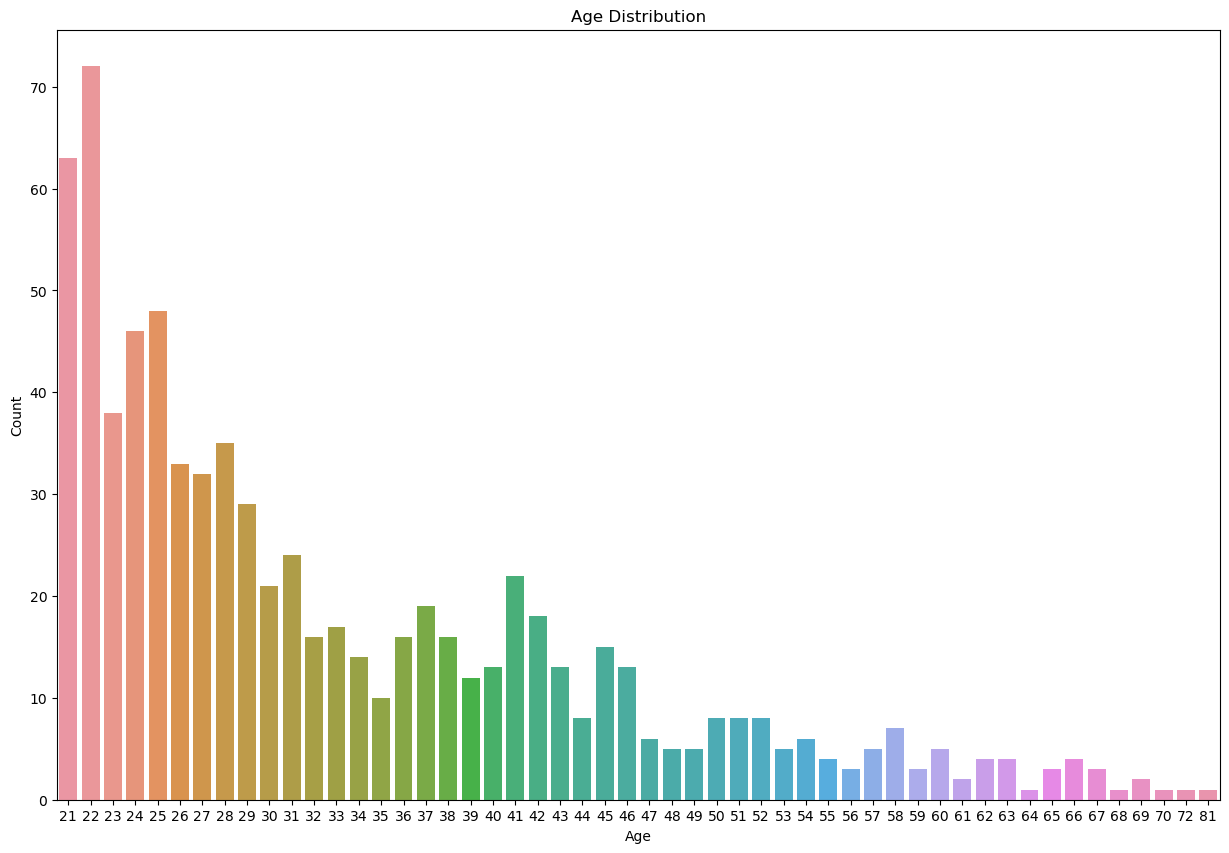

In [13]:
# Adjust the size of all figures
plt.rcParams["figure.figsize"] = (15, 10)
sns.countplot(x="Age", data=df)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

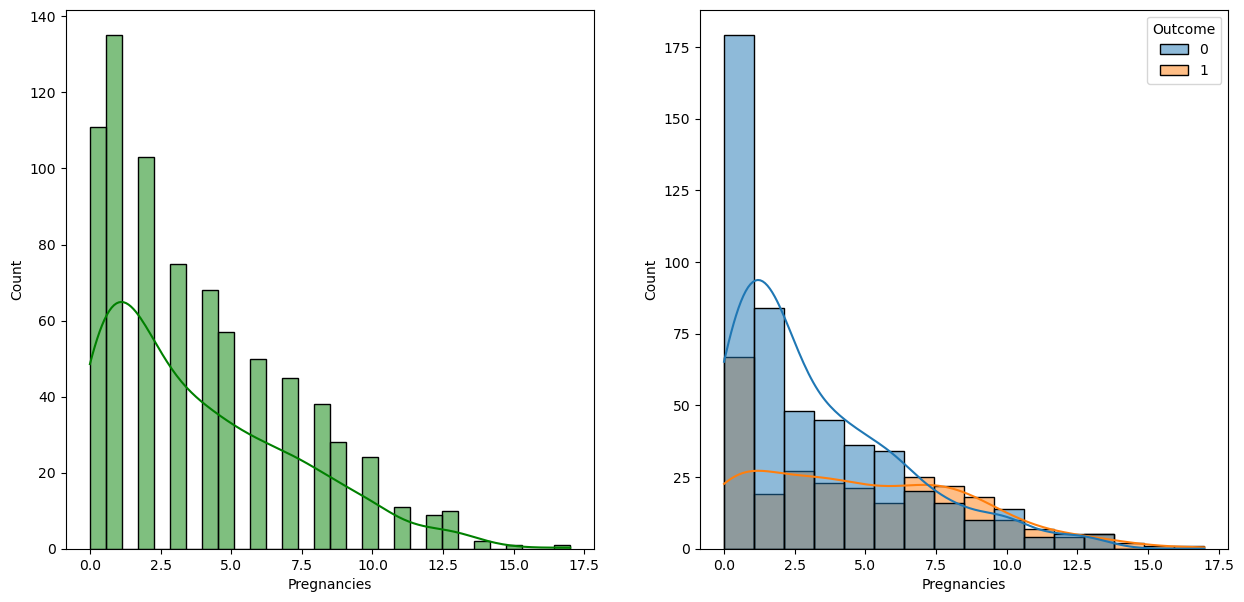

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Pregnancies',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Pregnancies',kde=True,hue='Outcome')
plt.show()

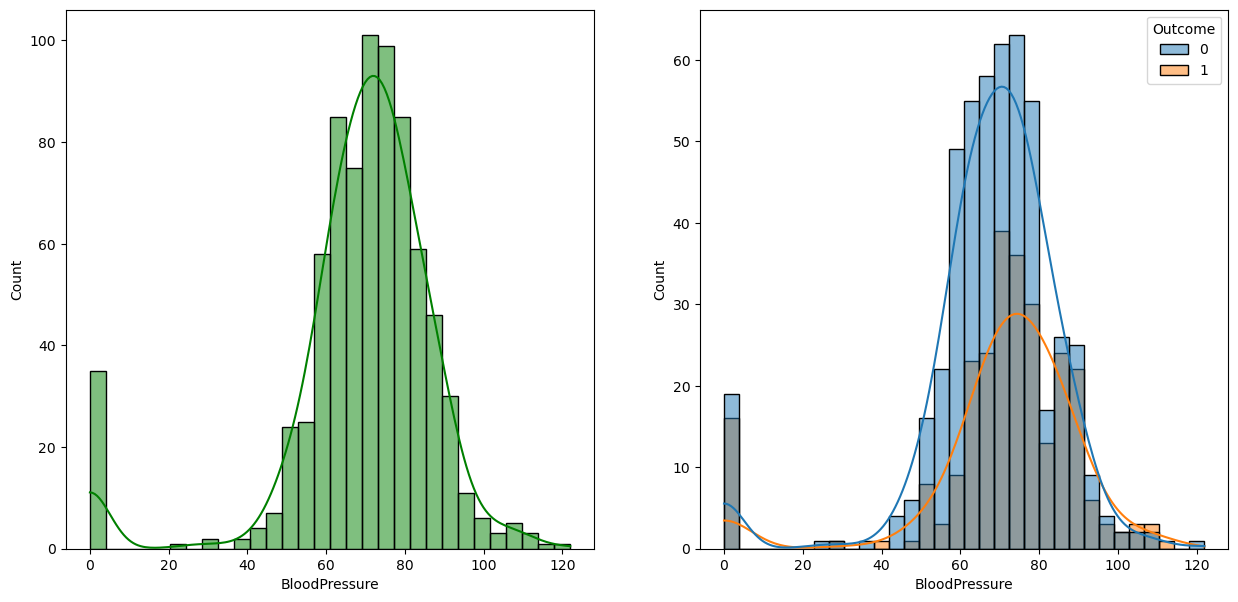

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='BloodPressure',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='BloodPressure',kde=True,hue='Outcome')
plt.show()

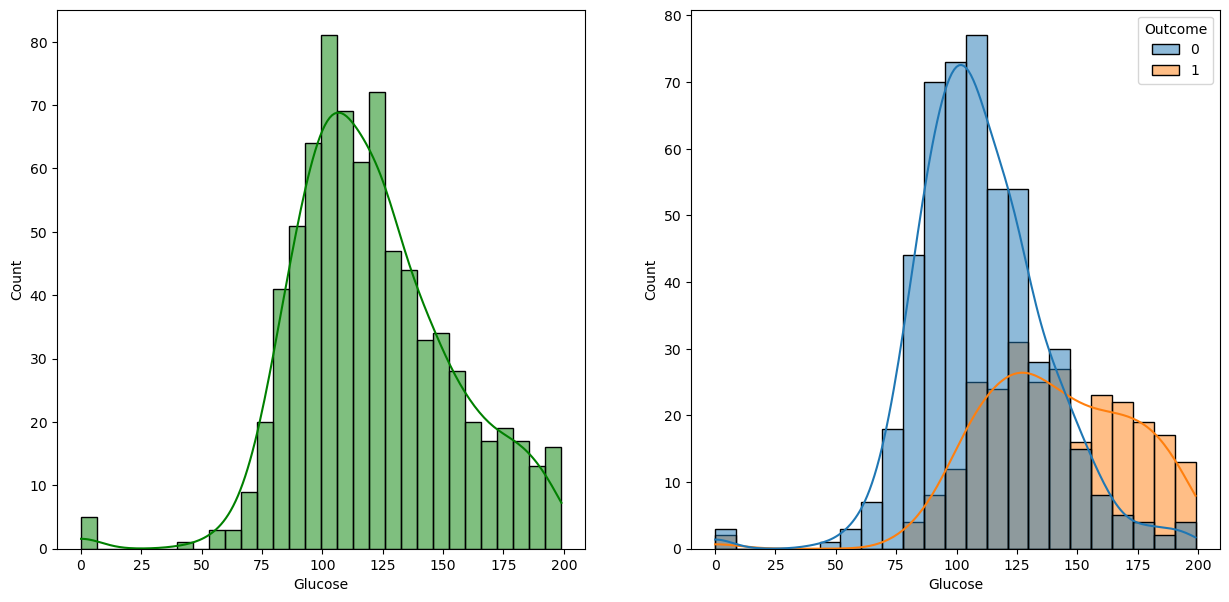

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Glucose',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Glucose',kde=True,hue='Outcome')
plt.show()

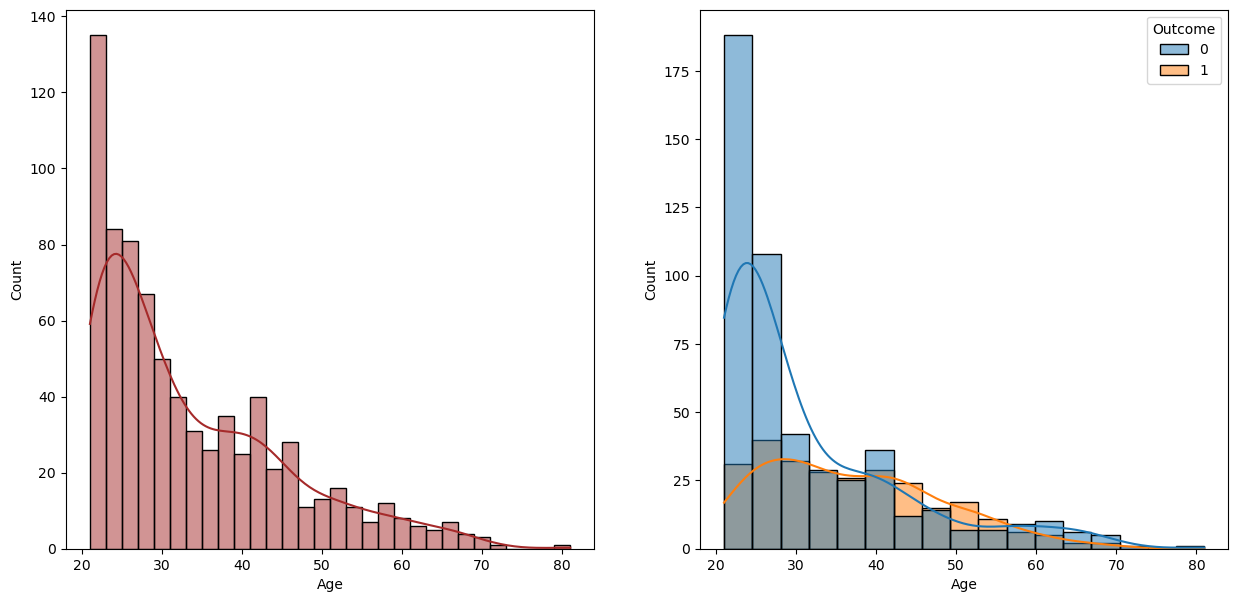

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='Age',bins=30,kde=True,color='brown')
plt.subplot(122)
sns.histplot(data=df,x='Age',kde=True,hue='Outcome')
plt.show()

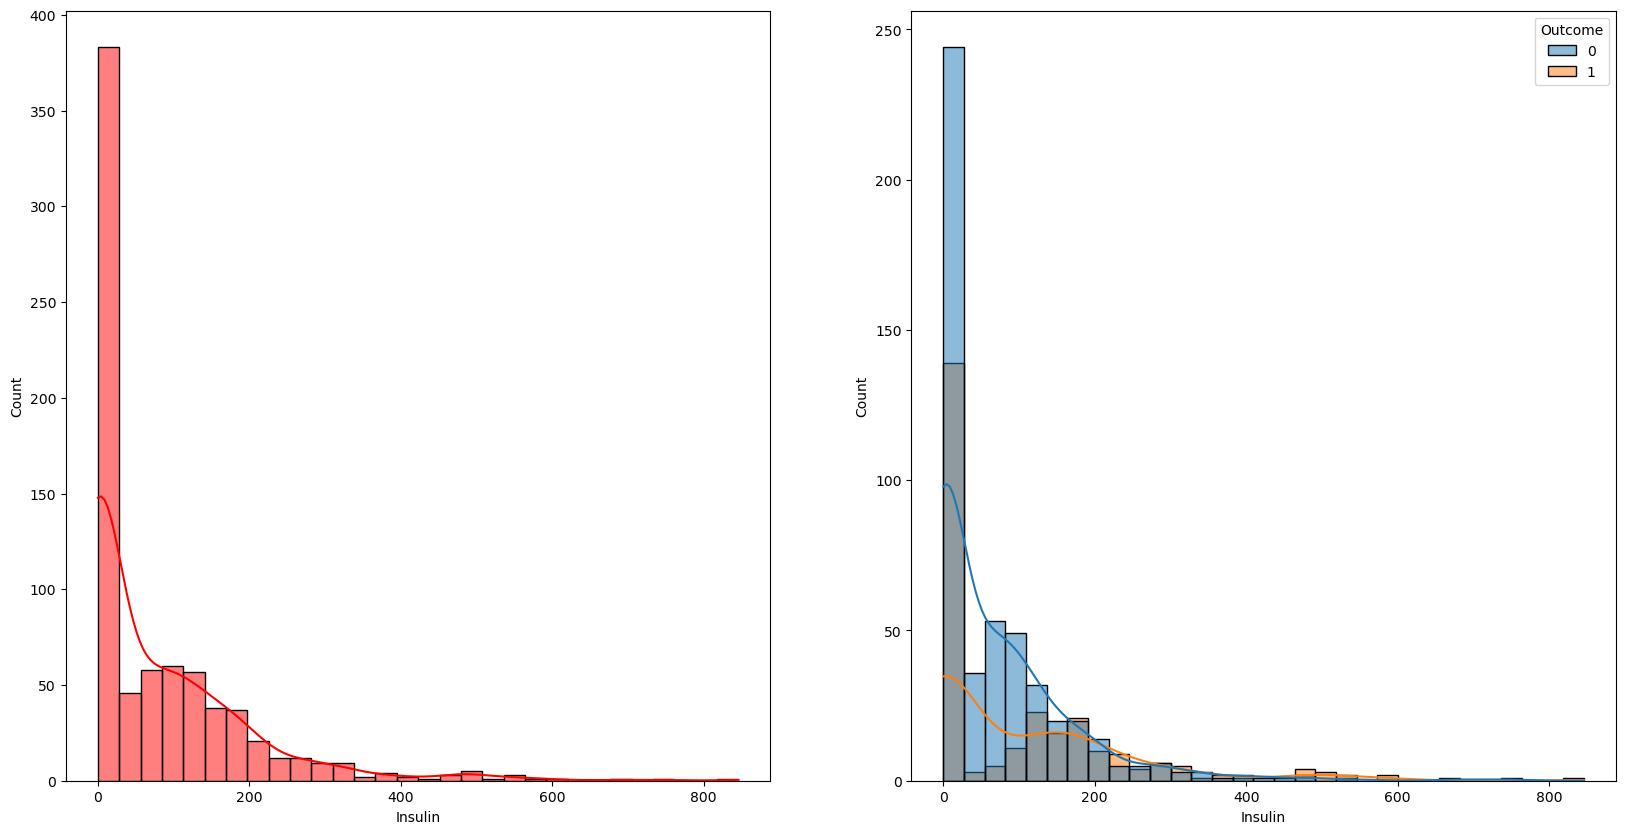

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plt.subplot(121)
sns.histplot(data=df,x='Insulin',bins=30,kde=True,color='r')
plt.subplot(122)
sns.histplot(data=df,x='Insulin',kde=True,hue='Outcome')
plt.show()

## 4.3 Distribution of the Outcome to know the % of the people that will Survive of Die

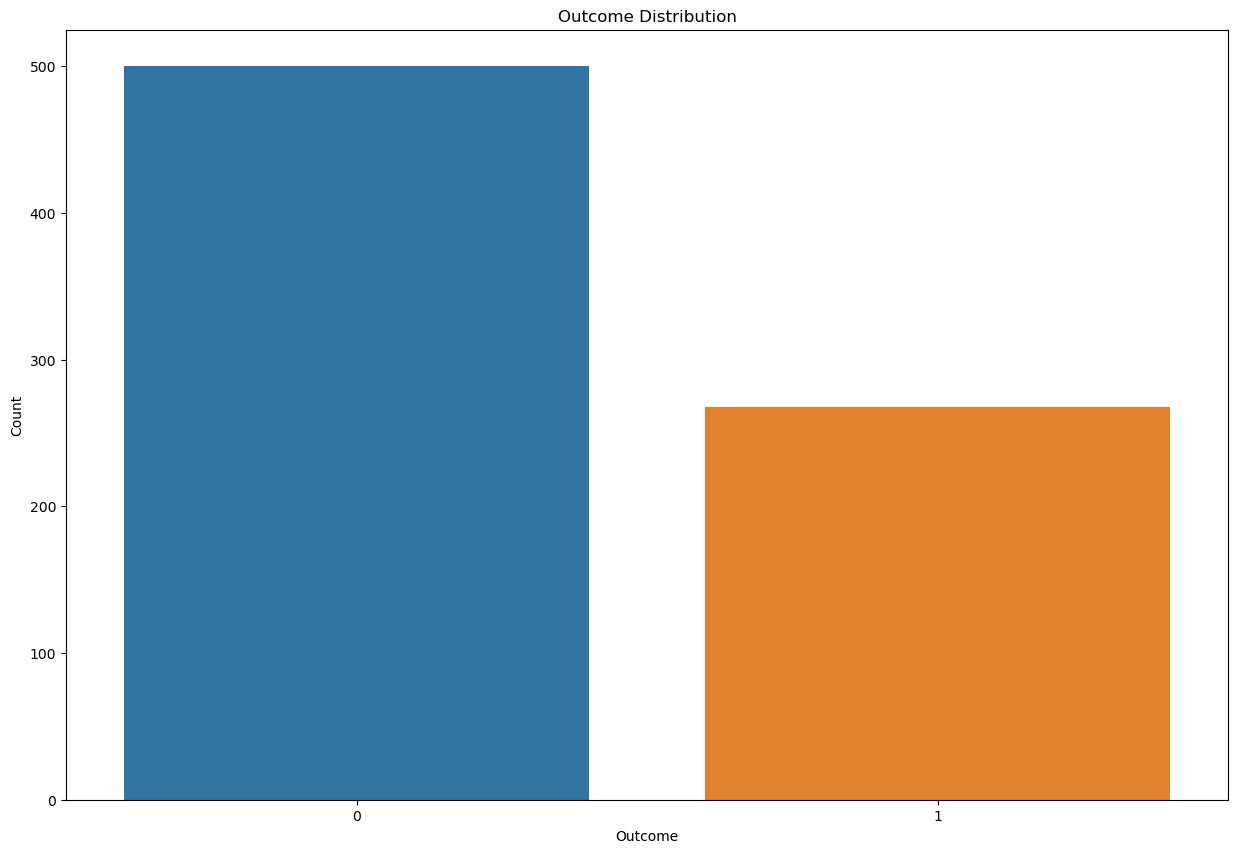

In [22]:

sns.countplot(x="Outcome", data=df)
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

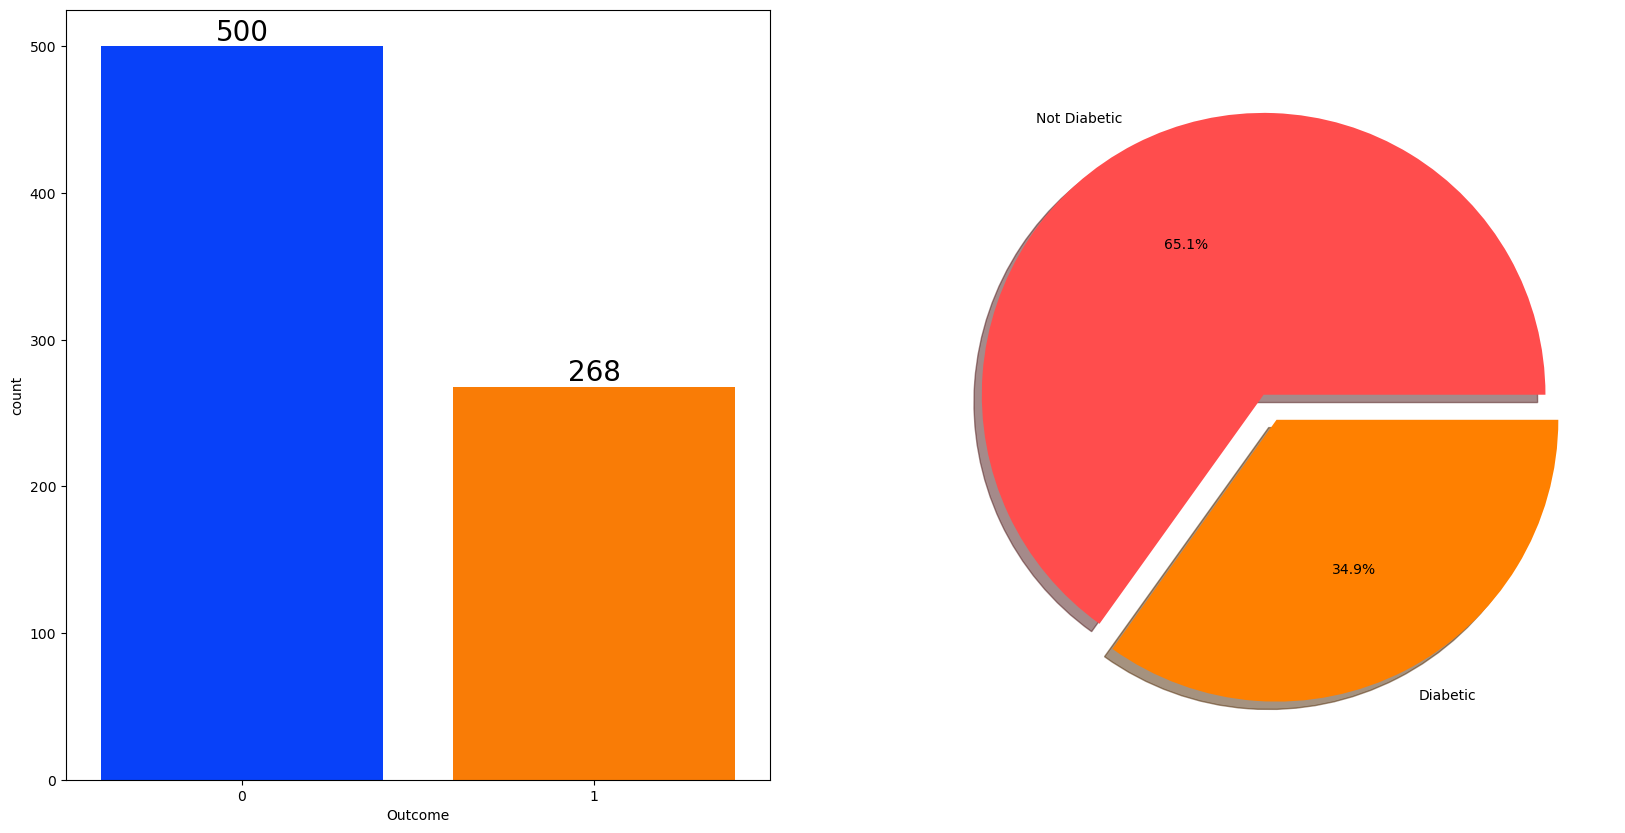

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['Outcome'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['Outcome'].value_counts(),labels=['Not Diabetic','Diabetic'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

## 4.4 Range of all the independent variables

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

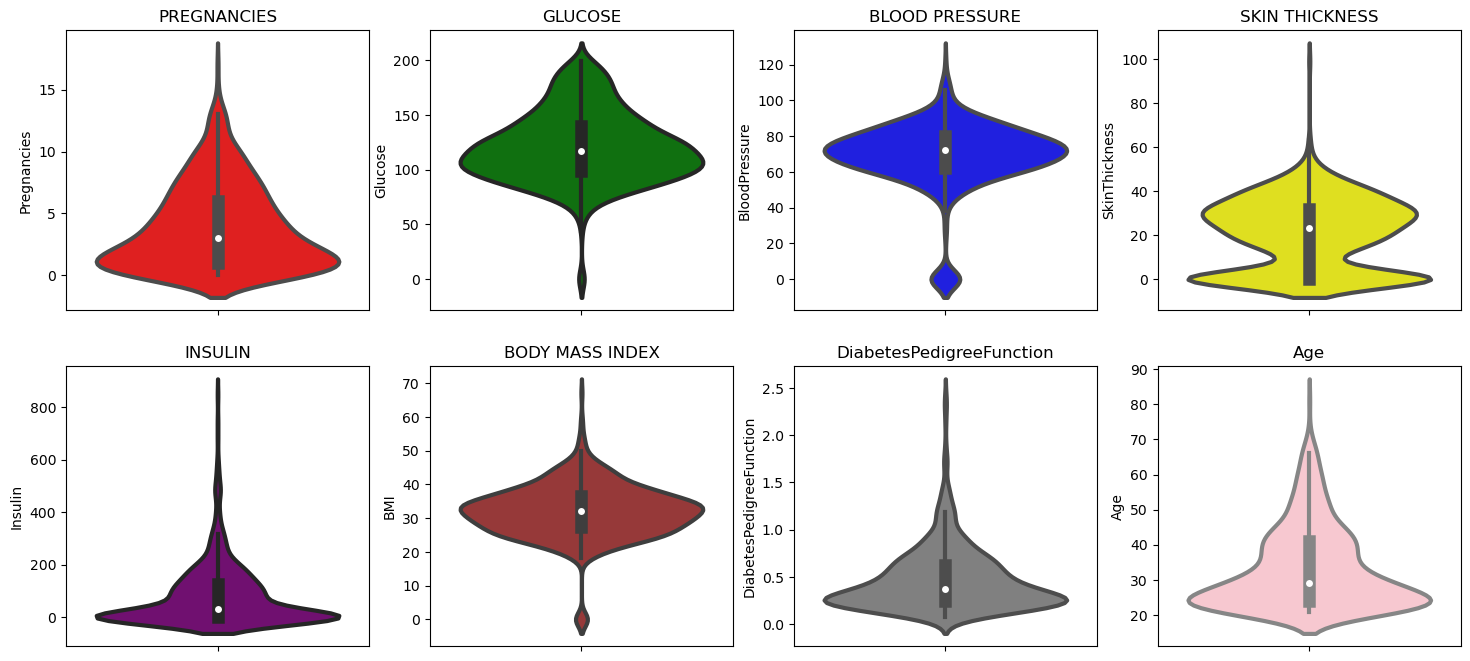

In [29]:
plt.figure(figsize=(18,8))
plt.subplot(2, 4, 1)
plt.title('PREGNANCIES')
sns.violinplot(y='Pregnancies',data=df,color='red',linewidth=3)
plt.subplot(2, 4, 2)
plt.title('GLUCOSE')
sns.violinplot(y='Glucose',data=df,color='green',linewidth=3)
plt.subplot(2, 4, 3)
plt.title('BLOOD PRESSURE')
sns.violinplot(y='BloodPressure',data=df,color='blue',linewidth=3)
plt.subplot(2, 4, 4)
plt.title('SKIN THICKNESS')
sns.violinplot(y='SkinThickness',data=df,color='yellow',linewidth=3)
plt.subplot(2, 4, 5)
plt.title('INSULIN')
sns.violinplot(y='Insulin',data=df,color='purple',linewidth=3)
plt.subplot(2, 4, 6)
plt.title('BODY MASS INDEX')
sns.violinplot(y='BMI',data=df,color='brown',linewidth=3)
plt.subplot(2, 4, 7)
plt.title('DiabetesPedigreeFunction')
sns.violinplot(y='DiabetesPedigreeFunction',data=df,color='grey',linewidth=3)
plt.subplot(2, 4, 8)
plt.title('Age')
sns.violinplot(y='Age',data=df,color='pink',linewidth=3)
plt.show()

## 4.5 Relationship between Outcome and other Parameters

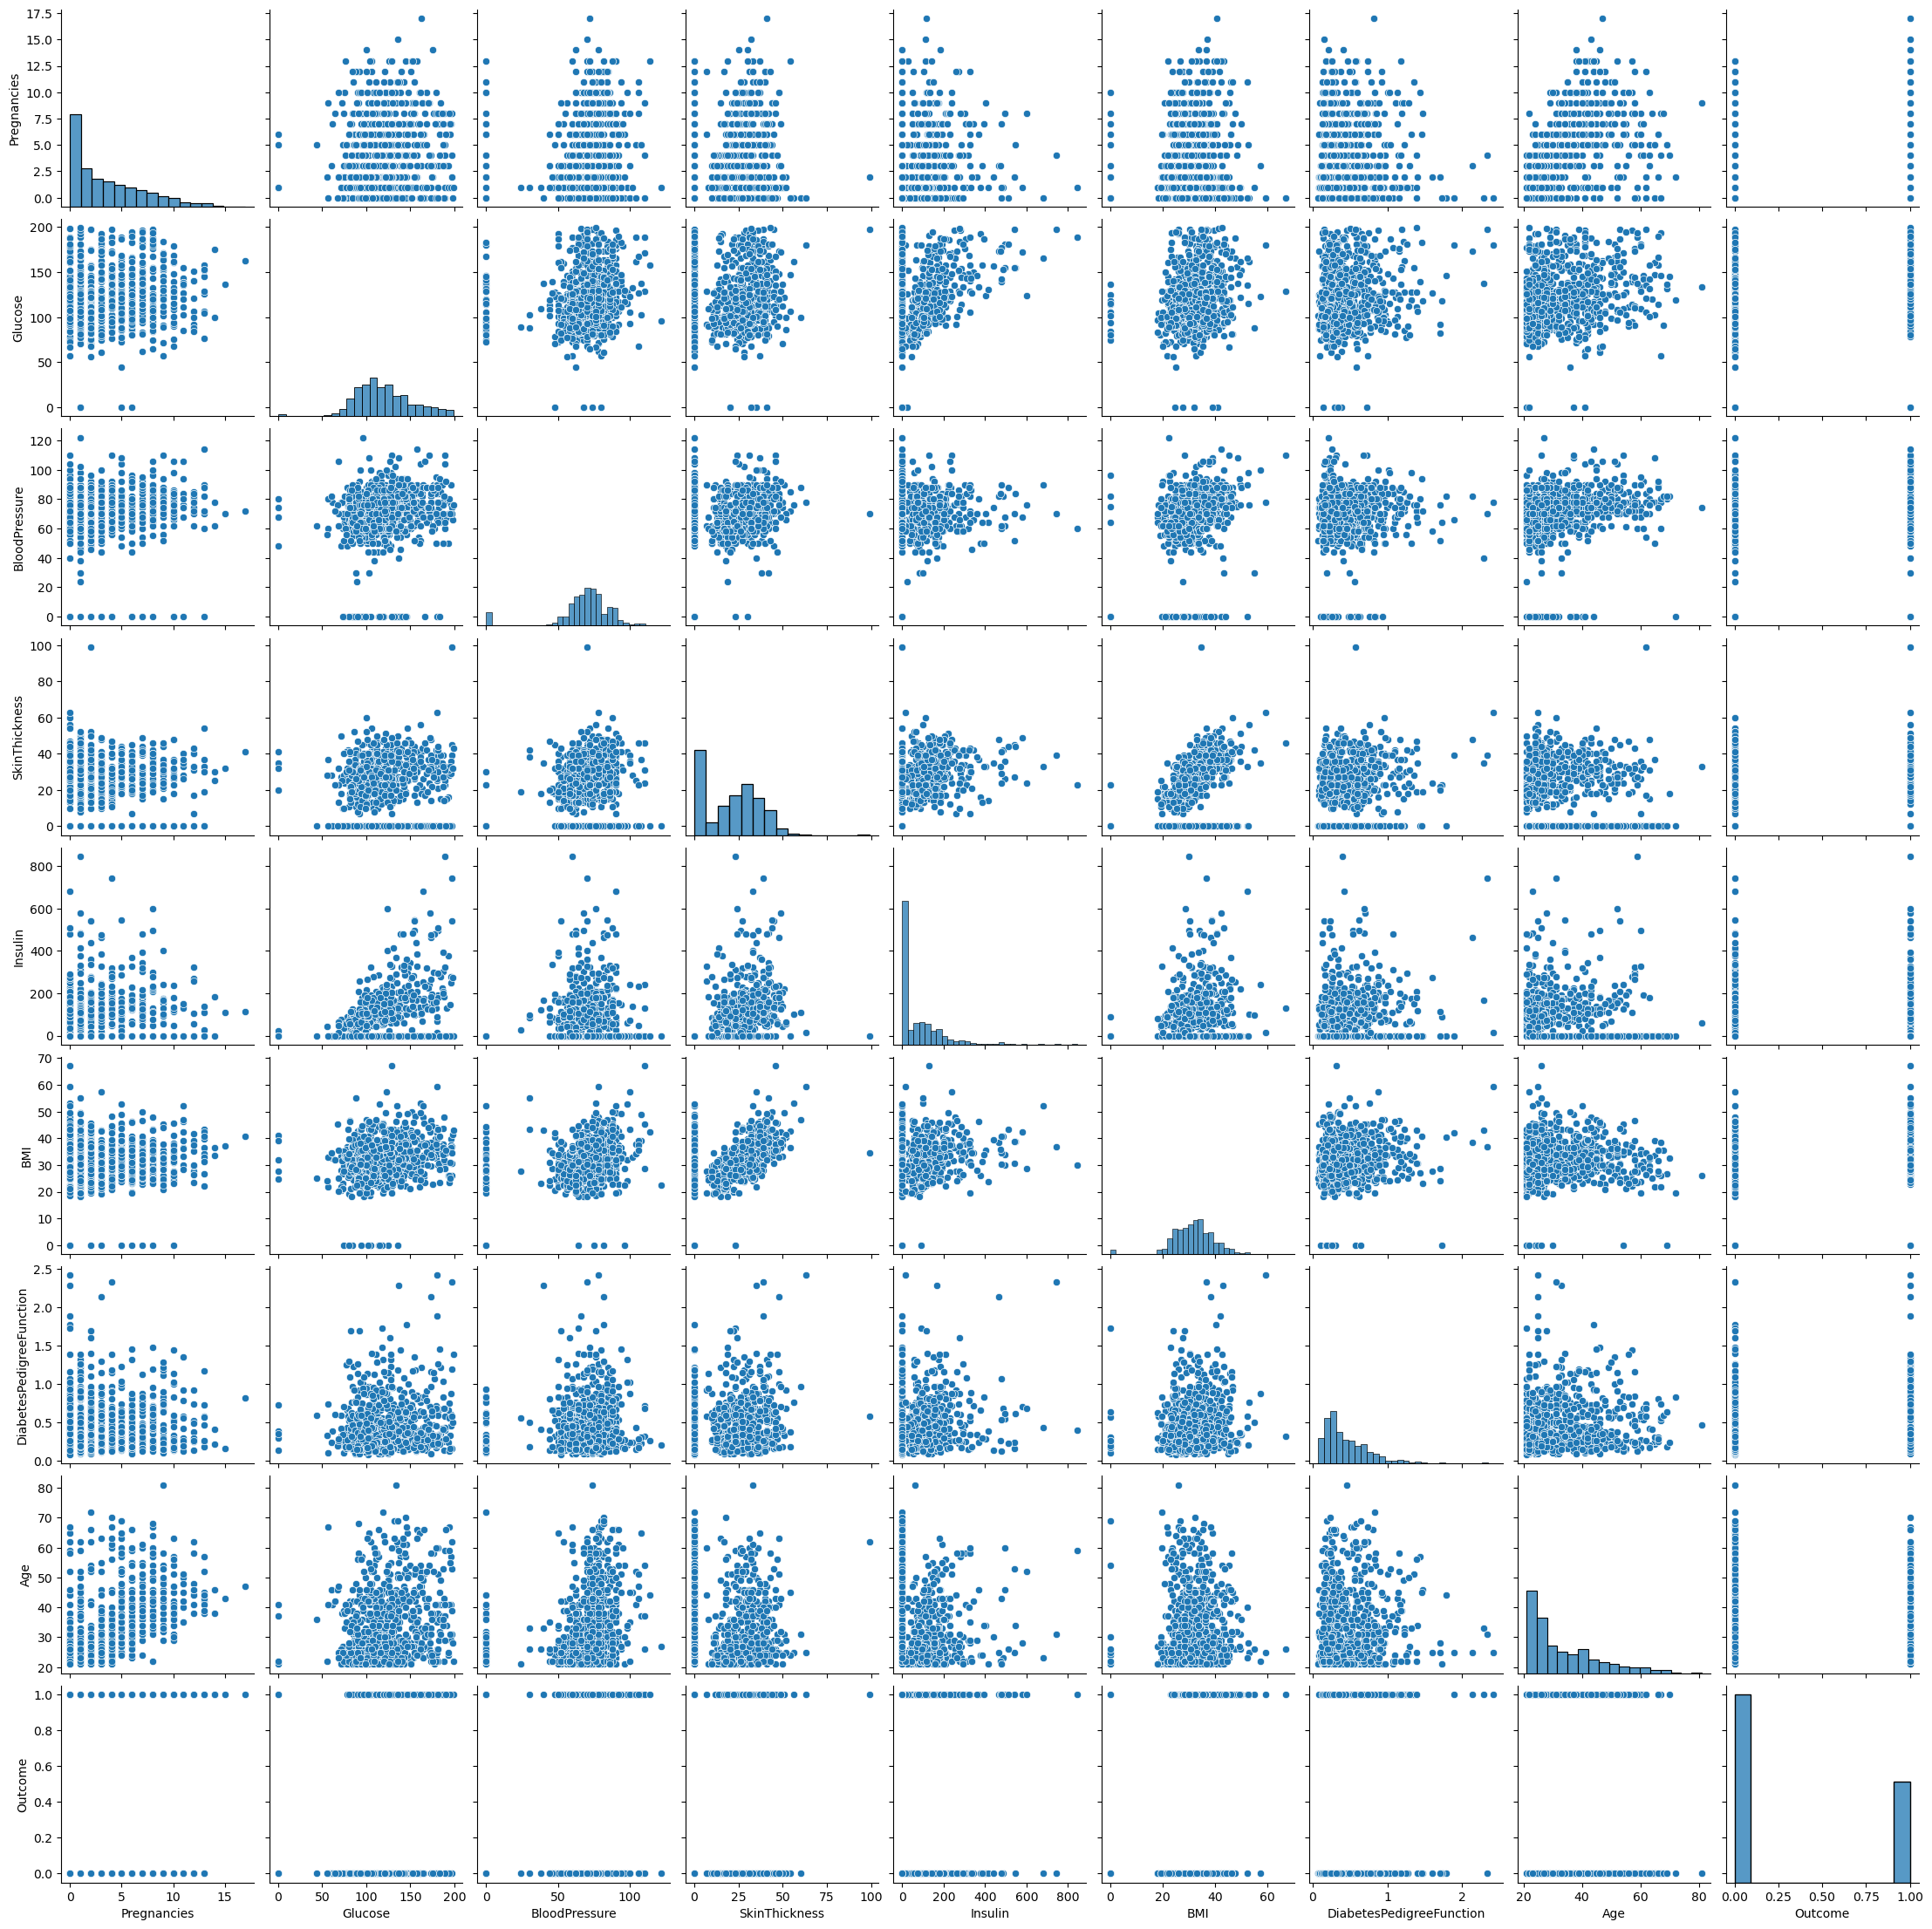

In [15]:
# Visualize the data using seaborn Pairplots

g = sns.pairplot(df)

# Notes: Do not run this on a big dataset. Filter the columns first

## 4.6 Effect of each parameters on the survival of patient

* How does Glucose affect a diabetics
* How does Insulin affect diabetics
* How does Age affect diabetics
* How does Body Mass Index affect diabetics

##### BIVARIATE ANALYSIS ( Does Glucose, Insulin, Age, BMI have any impact on the outcome of diabetes which is live of dealth? )

<Axes: xlabel='Outcome', ylabel='Age'>

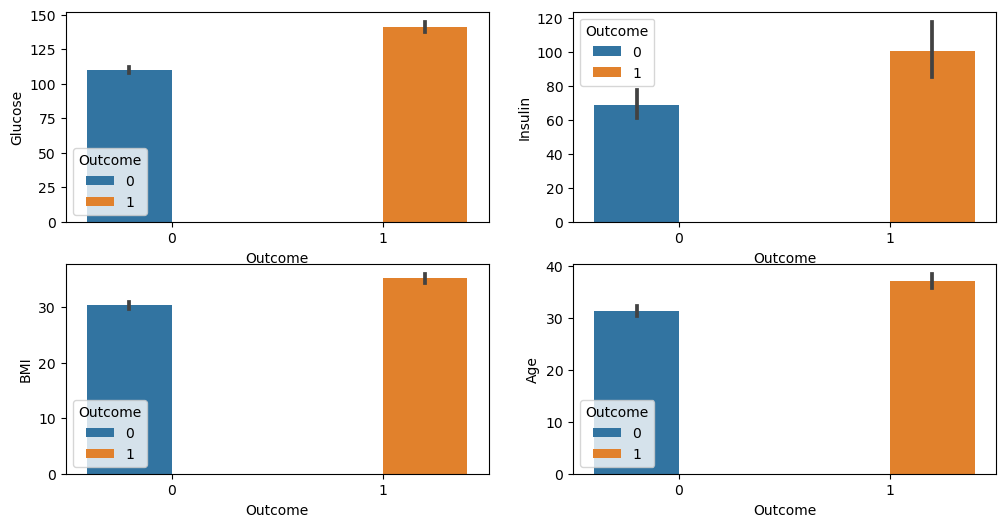

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['Outcome'], y=df['Glucose'], hue=df['Outcome'])
plt.subplot(2,2,2)
sns.barplot (x=df['Outcome'], y=df['Insulin'], hue=df['Outcome'])
plt.subplot(2,2,3)
sns.barplot (x=df['Outcome'], y=df['BMI'], hue=df['Outcome'])
plt.subplot(2,2,4)
sns.barplot (x=df['Outcome'], y=df['Age'], hue=df['Outcome'])

## 4.7 Gender and the mean value of all the dependent variable

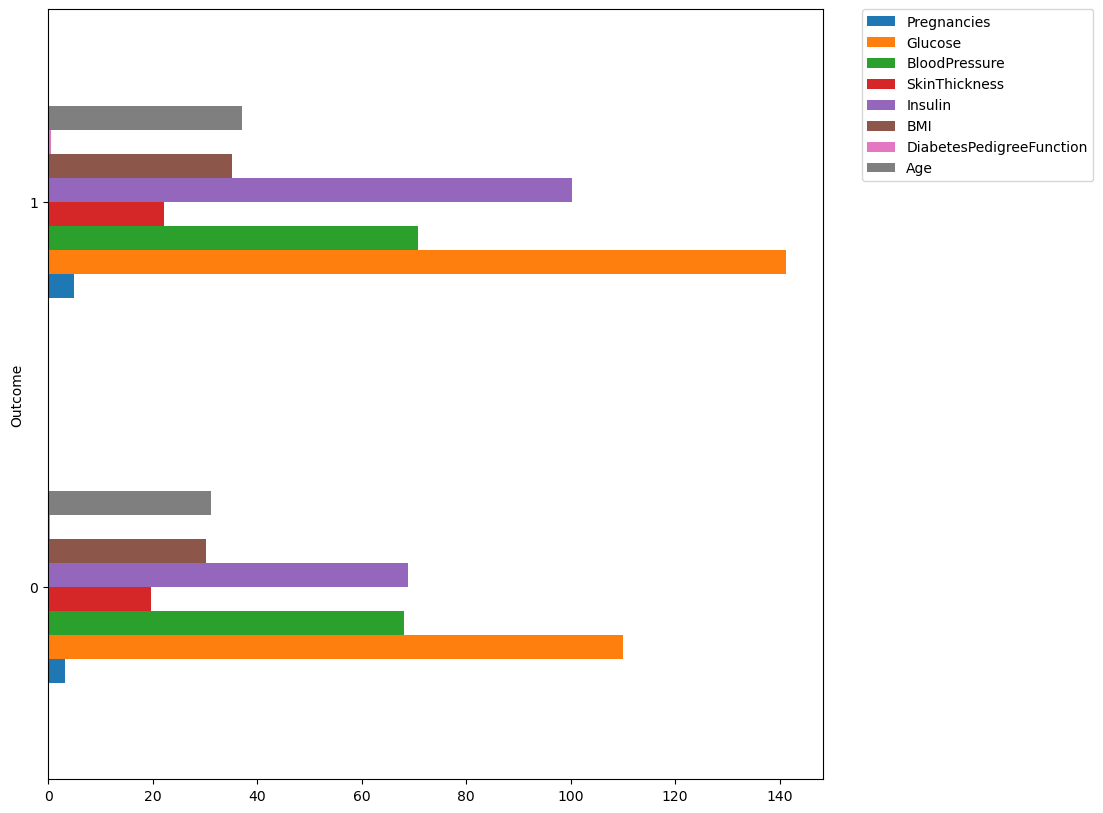

In [55]:
df.groupby('Outcome')[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 4.8 Identifyin the Outliers in all the independent variable

In [56]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

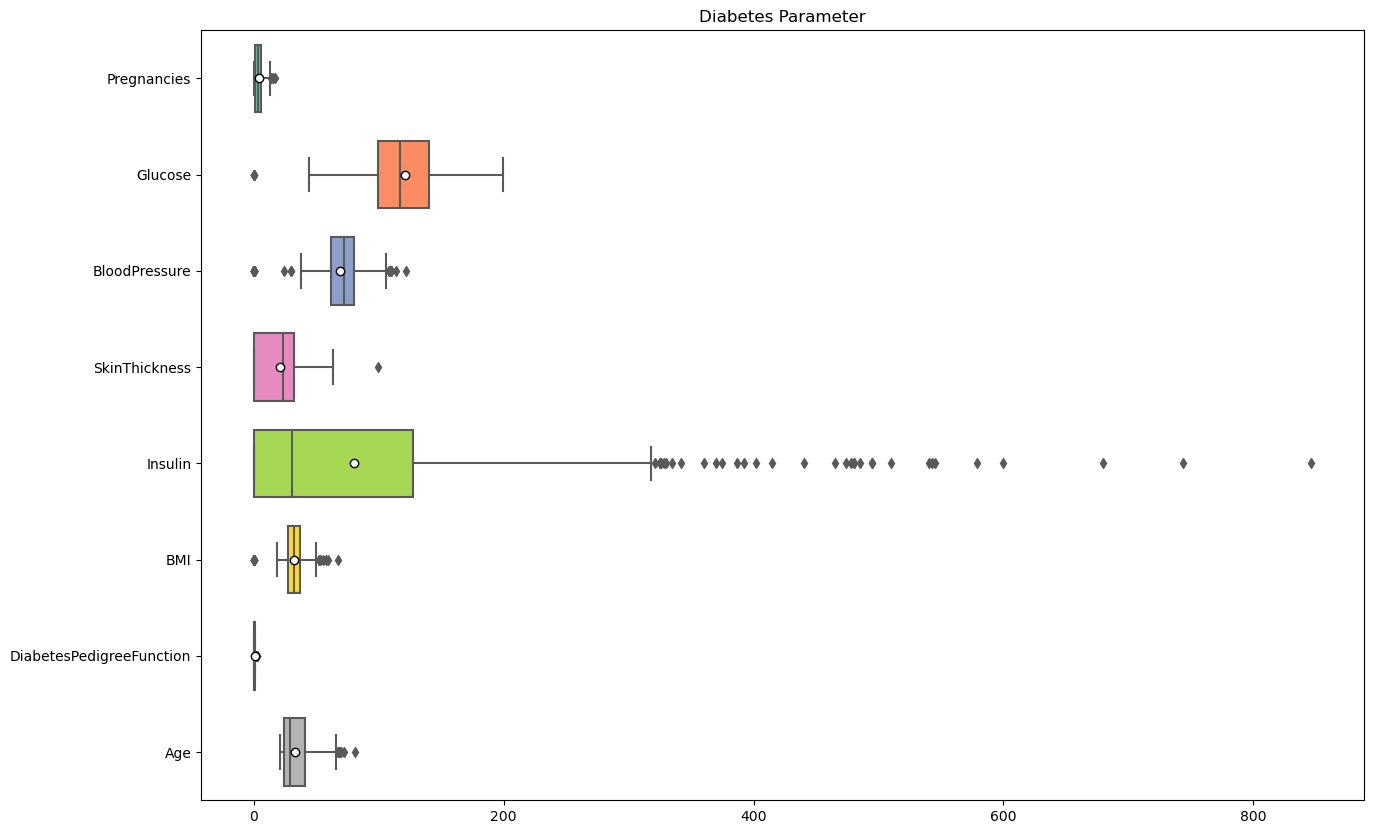

In [58]:
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']], palette="Set2", orient="h",
            whis=1.5, saturation=1, width=0.7, showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"})
plt.title("Diabetes Parameter")
plt.yticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7], labels=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
plt.show()

In [33]:
#feature variables
x=df.drop(['Outcome'], axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [34]:
#target variable
y=df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [35]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [36]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [37]:
y_pred 

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      dtype=int64)

In [38]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 66.88311688311688


<Axes: >

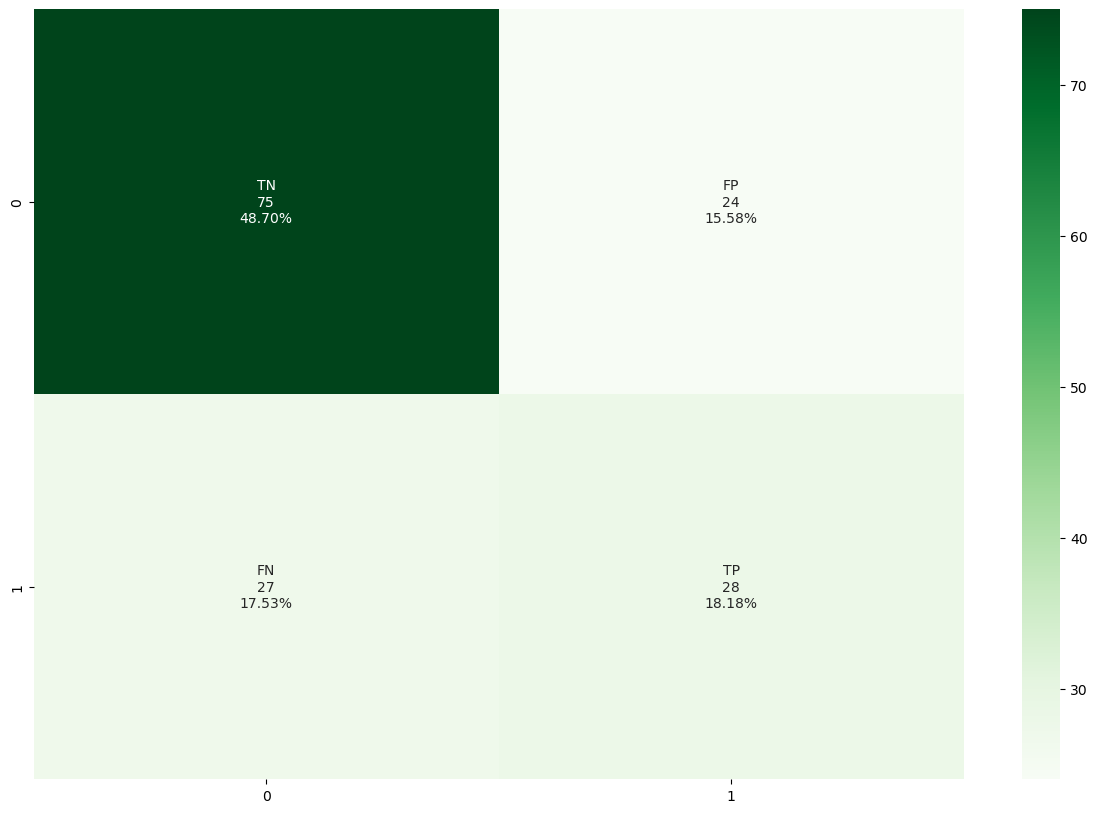

In [39]:
#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
#confusion_matrix = confusion_matrix(Y_pred_scratch, Y_test)

#[row, column]
TP = confusion_matrix[1, 1]        
TN = confusion_matrix[0, 0]           
FP = confusion_matrix[0, 1]           
FN = confusion_matrix[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Greens')

In [40]:
print("Accuracy:",((75+31)/154))

Accuracy: 0.6883116883116883


In [41]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.54      0.51      0.52        55

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.66      0.67      0.67       154



In [44]:
#checking prediction value
y_test_predict = model.predict([[6,148,72,35,0,33.6,0.627,50]])
y_test_predict


array([1], dtype=int64)

In [45]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
import six
from io import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [46]:
features=x.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

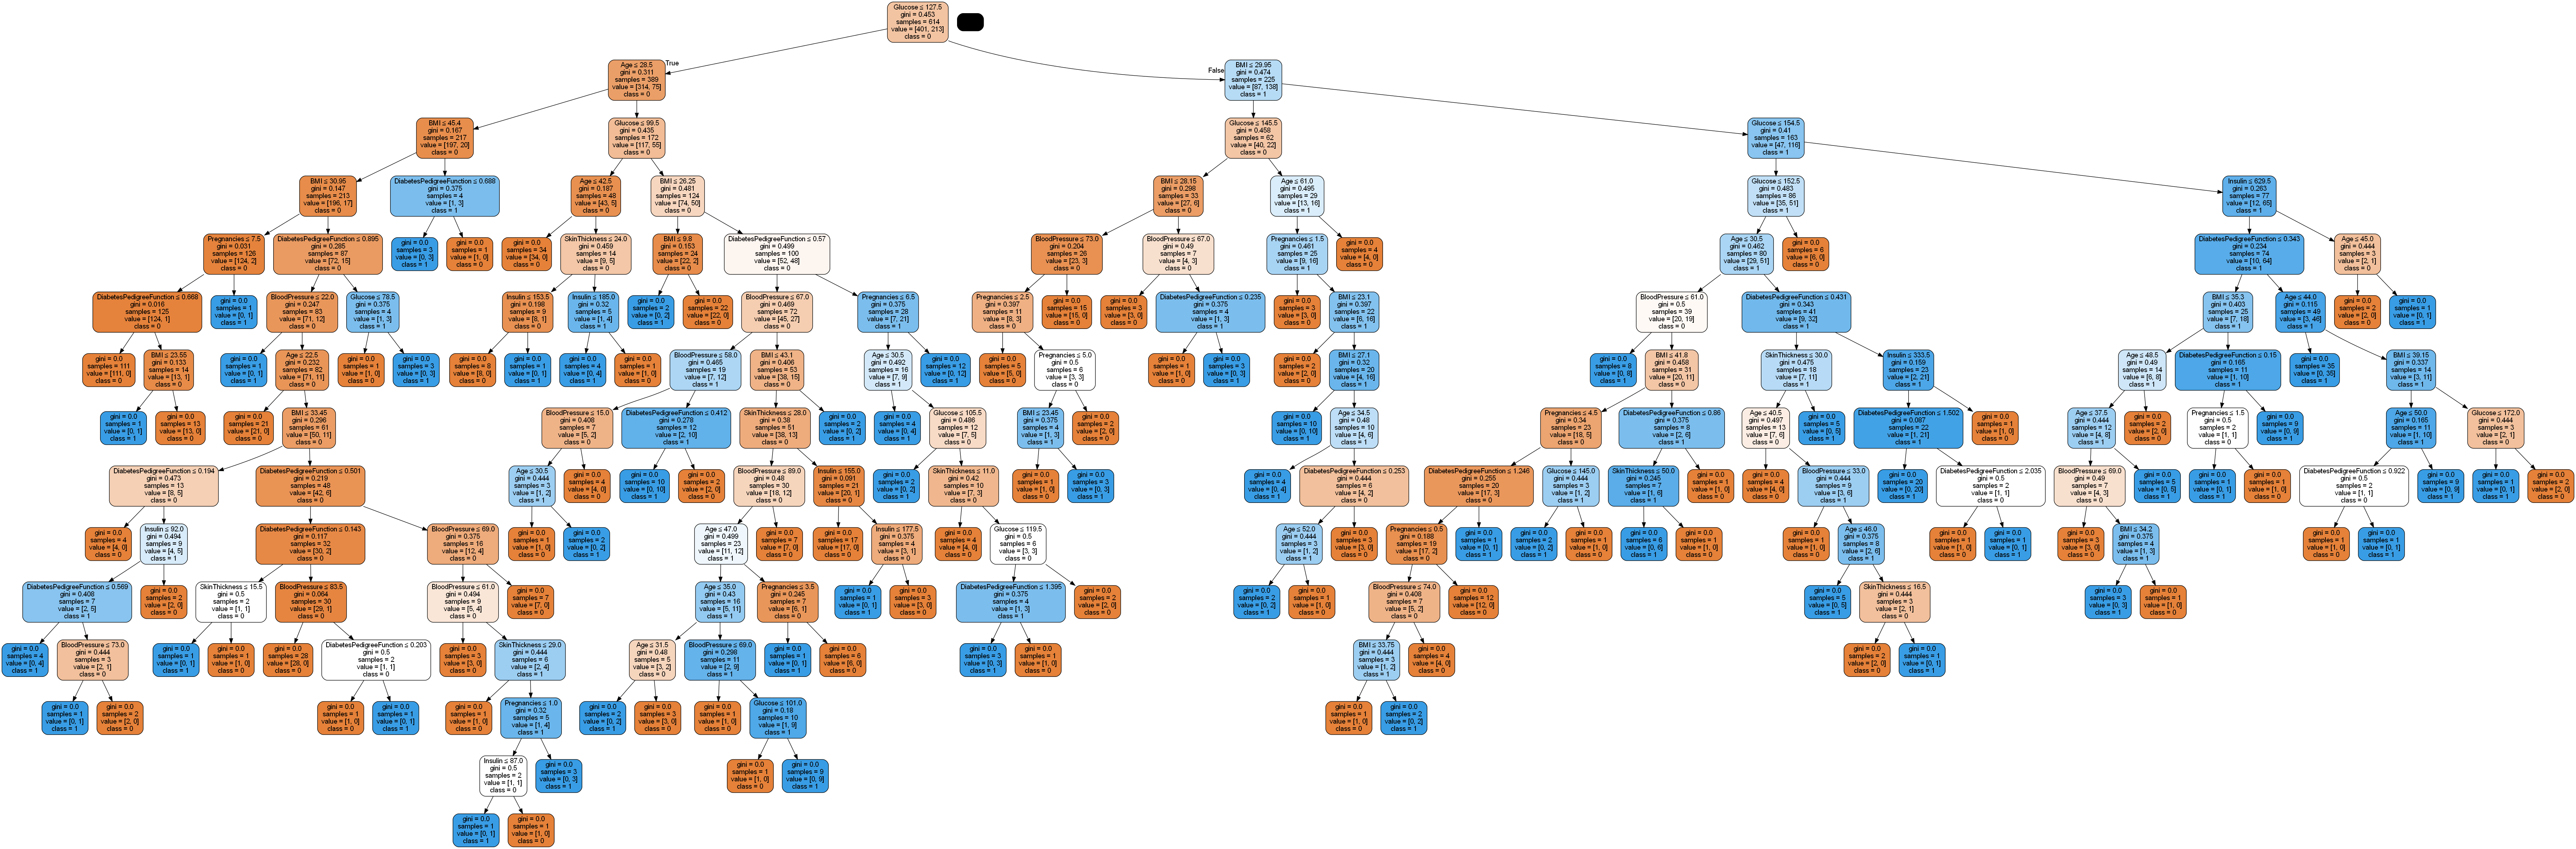

In [47]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())

In [48]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 79.87012987012987


The classification rate increased to 79.87%, which is better accuracy than the previous model.



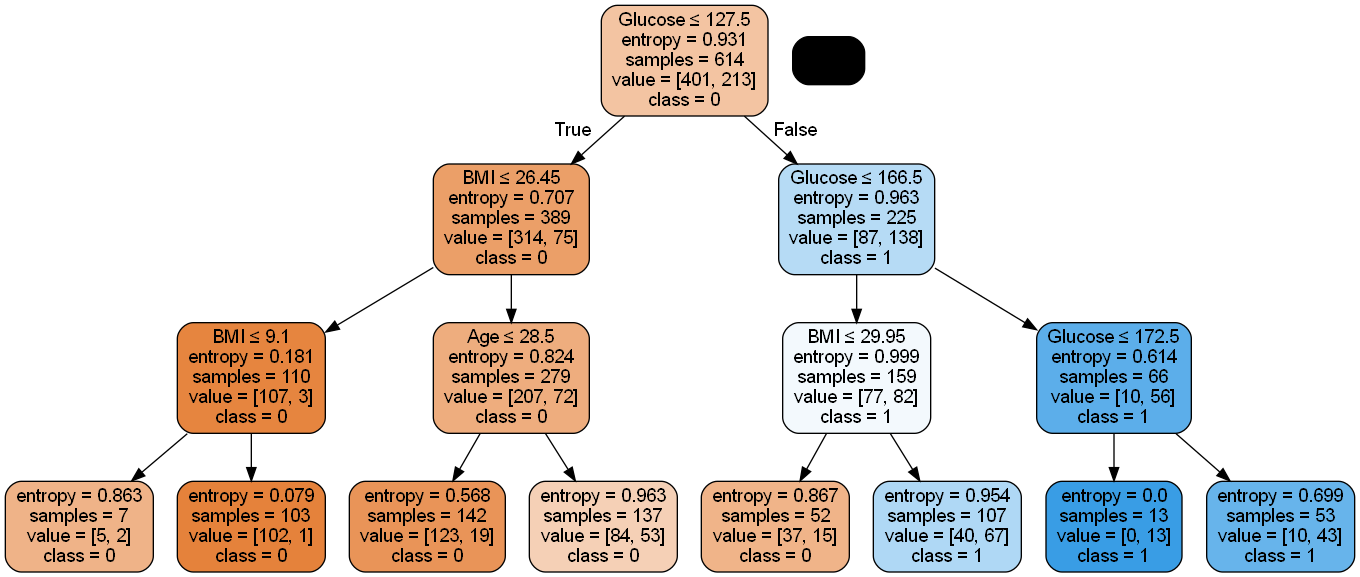

In [49]:
#Better Decision Tree Visualisation
from io import StringIO
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_set.png')
Image(graph.create_png())